<a href="https://colab.research.google.com/github/A1abhiral/Final-Portfolio-AI-/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis Statistical Interpretation and Visualizations.

🔹 First 5 Rows of Dataset:
        Date  Salinity (ppt)  DissolvedOxygen (mg/L)   pH  SecchiDepth (m)  \
0 1989-05-11             NaN                     NaN  7.5              0.3   
1 1989-05-18             NaN                    12.0  7.5              0.2   
2 1989-05-25             NaN                     NaN  8.0              0.4   
3 1989-06-01             NaN                    12.0  8.0              0.4   
4 1989-07-11             NaN                     NaN  8.5              0.3   

   WaterDepth (m)  WaterTemp (C)  AirTemp (C)  
0             0.9           17.0   -17.777778  
1             0.6           17.5    20.500000  
2             0.8           23.0    25.000000  
3             0.9           25.5    29.000000  
4             0.9           28.5    28.000000  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  ----

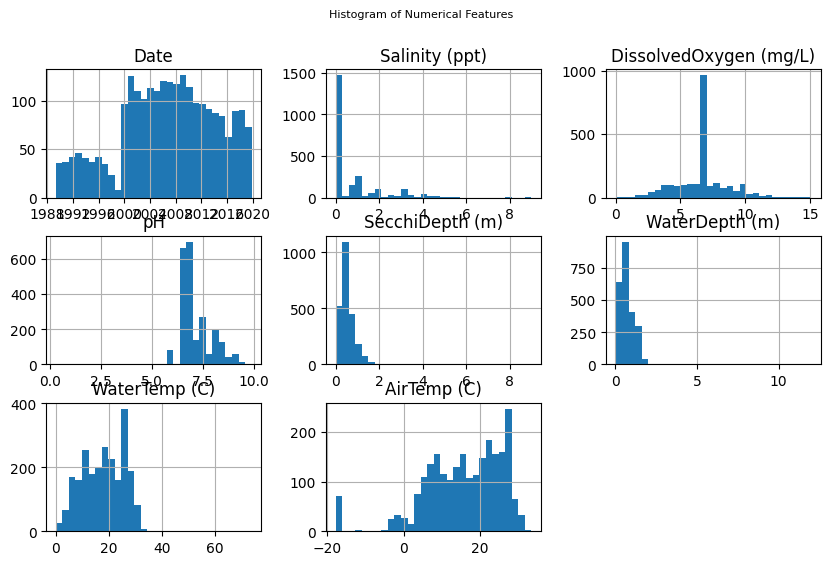

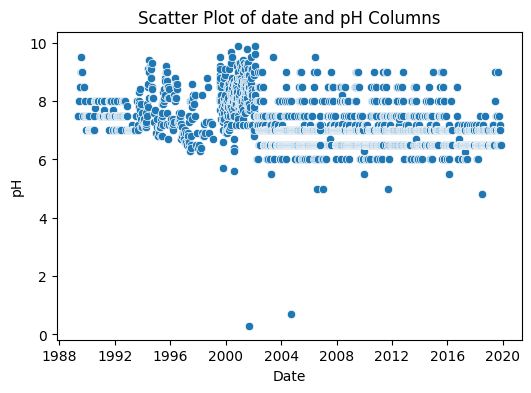

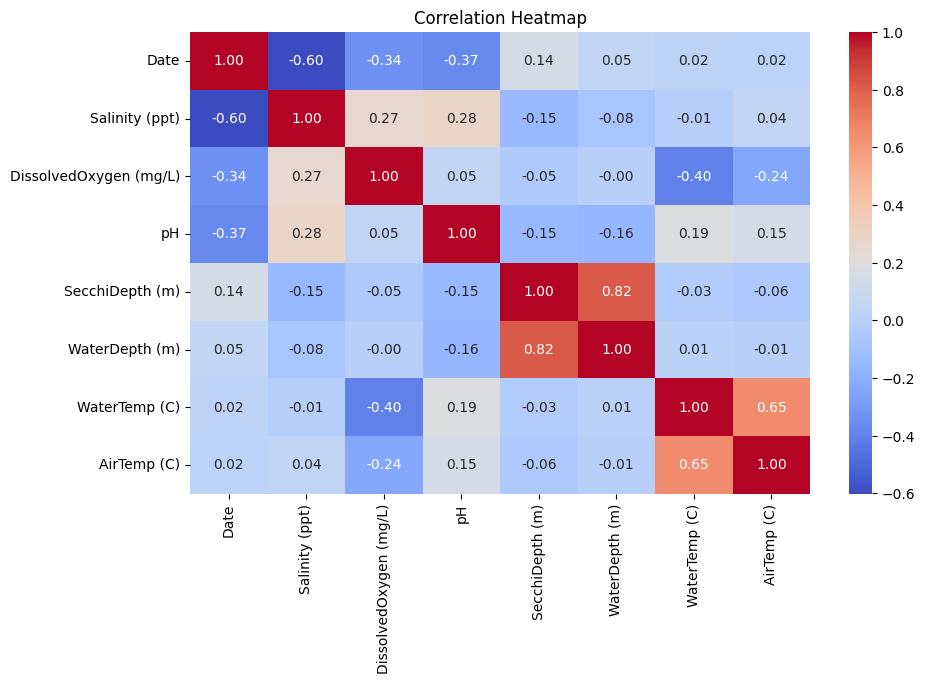

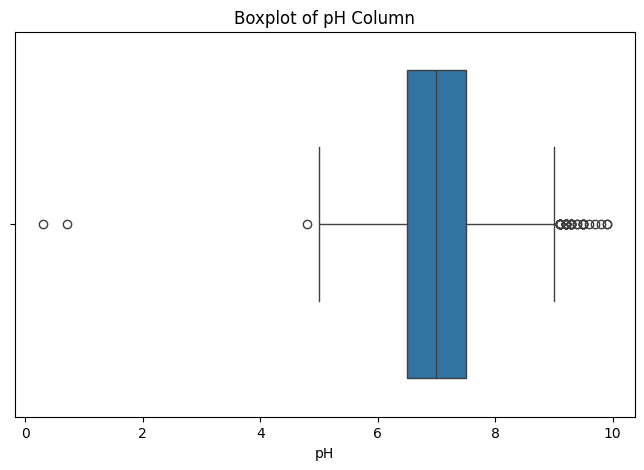


✅ Cleaned dataset saved as 'cleaned_data_regression.csv'


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 2: Upload and Load Dataset
df = pd.read_csv("/content/drive/MyDrive/final assignment(AI)/waterquality (regression).csv")

# Convert Date Column to Datetime Format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Display first 5 rows
print("🔹 First 5 Rows of Dataset:")
print(df.head())

# Step 3: Check Dataset Information
print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Dataset Summary Statistics:")
print(df.describe())

# Step 4: Check for Missing Values
print("\n🔹 Missing Values Count:")
print(df.isnull().sum())

# Fill missing values with column mean (for numerical columns)
df.fillna(df.mean(), inplace=True)

# Step 5: Data Visualizations

# Histogram (Data Distribution)
df.hist(figsize=(10, 6), bins=30)
plt.suptitle("Histogram of Numerical Features", fontsize=8)
plt.show()

# Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 3])
plt.title("Scatter Plot of date and pH Columns")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df.iloc[:, 3])
plt.title("Boxplot of pH Column")
plt.show()

# Step 6: Save Cleaned Data
df.to_csv("/content/drive/MyDrive/cleaned_data_regression.csv", index=False)

print("\n✅ Cleaned dataset saved as 'cleaned_data_regression.csv'")


Linear Regression from Scratch.

Final Weights (m): [ 0.19904481  0.04875631  0.01981936 -0.12276285  0.15390519  0.01905128]
Final Bias (b): 7.165826293960735
Final Mean Squared Error: 0.5124751139869693


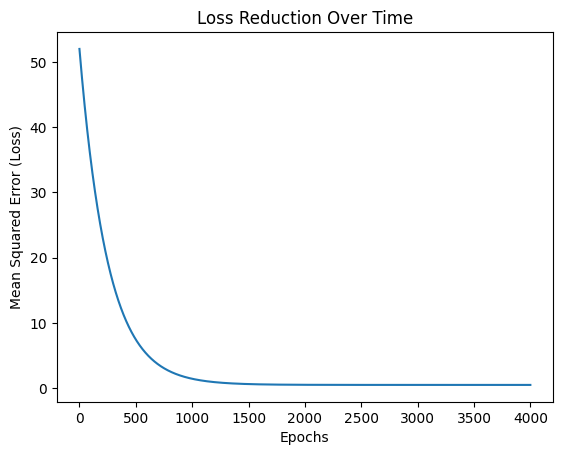

Predicted Value for New Data: [[7.18309563]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Dataset
df = pd.read_csv("/content/drive/MyDrive/final assignment(AI)/cleaned_data_regression.csv")  # Update with your dataset path

# Drop the 'Date' column
df = df.drop(columns=['Date'])

# Step 2: Prepare Features (X) and Target (y)
target_column = 'pH'
X = df.drop(columns=[target_column]).values
y = df[target_column].values.reshape(-1, 1)

# Step 2.1: Manual Standardization
X_mean = np.mean(X, axis=0)  # Calculate mean for each feature
X_std = np.std(X, axis=0)  # Calculate standard deviation for each feature

X = (X - X_mean) / X_std  # Standardize X manually

# Step 3: Initialize Parameters
m = np.zeros((X.shape[1], 1))  # Weights for features
b = 0  # Bias term
learning_rate = 0.001
epochs = 4000
n = len(y)

# Step 4: Implement Gradient Descent
losses = []

for epoch in range(epochs):
    y_pred = np.dot(X, m) + b
    error = y_pred - y
    cost = (1/n) * np.sum(error ** 2)  # Mean Squared Error (MSE)

    # Compute Gradients
    m_gradient = (2/n) * np.dot(X.T, error)
    b_gradient = (2/n) * np.sum(error)

    # Update Weights and Bias
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient

    losses.append(cost)

# Step 5: Display Final Weights and Bias
print("Final Weights (m):", m.flatten())
print("Final Bias (b):", b)

# Step 6: Evaluate Model Performance
print("Final Mean Squared Error:", losses[-1])

# Step 7: Plot Loss Over Time
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Loss Reduction Over Time")
plt.show()

# Step 8: Make Predictions on New Data
X_new = np.array([[3.5, 2.1, 5.0, 2.1, 5.5, 6.0]])
X_new = (X_new - X_mean) / X_std  # Standardize new data manually
y_new_pred = np.dot(X_new, m) + b  # Prediction
print("Predicted Value for New Data:", y_new_pred)


Model-1(linear regression using scikit-learn)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Load Dataset
df = pd.read_csv("/content/drive/MyDrive/final assignment(AI)/cleaned_data_regression.csv")

# Drop the 'Date' column
df = df.drop(columns=['Date'])

# Step 2: Prepare Features (X) and Target (y)
target_column = 'pH'  # Replace with the actual target column name
X = df.drop(columns=[target_column]).values  # Features (as NumPy array)
y = df[target_column].values.reshape(-1, 1)  # Target variable

# Step 2.1: Normalize/Standardize Features to Prevent Overflow
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize X (features)

# Step 3: Initialize the Model (Using Sklearn)
model = LinearRegression()

# Step 4: Fit the Model
model.fit(X, y)

# Step 5: Display Final Weights (Coefficients) and Bias (Intercept)
print("Final Weights (m):", model.coef_.flatten())
print("Final Bias (b):", model.intercept_)

# Step 6: Evaluate Model Performance
y_pred = model.predict(X)
mse = np.mean((y_pred - y) ** 2)  # Mean Squared Error
print("Final Mean Squared Error:", mse)

# Step 8: Make Predictions on New Data
X_new = np.array([[3.5, 2.1, 5.0, 2.1, 5.5, 6.0]])
X_new = scaler.transform(X_new)  # Make sure the new data is also standardized
y_new_pred = model.predict(X_new)  # Prediction for new data
print("Predicted Value for New Data:", y_new_pred)


Final Weights (m): [ 0.20044546  0.05237182  0.04593282 -0.14868479  0.16208533  0.01416196]
Final Bias (b): [7.16821178]
Final Mean Squared Error: 0.5121973896659395
Predicted Value for New Data: [[7.36638952]]


Model-2(Decision tree using scikit learn)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Load Dataset
df = pd.read_csv("/content/drive/MyDrive/final assignment(AI)/cleaned_data_regression.csv")
# Drop the 'Date' column
df = df.drop(columns=['Date'])

# Step 2: Prepare Features (X) and Target (y)
target_column = 'pH'
X = df.drop(columns=[target_column]).values
y = df[target_column].values.reshape(-1, 1)

# Step 2.1: Normalize/Standardize Features to Prevent Overflow
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize X (features)

# Step 3: Initialize and Train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)

# Step 4: Make Predictions on Training Data
y_pred = model.predict(X)

# Step 5: Evaluate Model Performance
# Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE) for Decision Tree:", mse)


# Step 7: Make Predictions on New Data
X_new = np.array([[3.5, 2.1, 5.0, 2.1, 5.5, 6.0]])
X_new = scaler.transform(X_new)  # Standardize the new data as well
y_new_pred = model.predict(X_new)  # Prediction for new data
print("Predicted Value for New Data:", y_new_pred)


Mean Squared Error (MSE) for Decision Tree: 0.0012638830310698723
Predicted Value for New Data: [8.1]


Result- Decision tree model performed better since it's MSE is lower than that of linear regression

Cross-Validation and Hyperparameter Optimization for Linear Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/final assignment(AI)/cleaned_data_regression.csv")
df = df.drop(columns=['Date'])

# Prepare Features and Target
target_column = 'pH'
X = df.drop(columns=[target_column]).values
y = df[target_column].values

# Standardize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression Model with Cross-validation
ridge_model = Ridge()

# Hyperparameter Grid for Ridge
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

# Apply GridSearchCV for Hyperparameter Tuning and Cross-Validation
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV on Training Data
grid_search_ridge.fit(X_train, y_train)

# Get the best hyperparameter and model
best_ridge_model = grid_search_ridge.best_estimator_
print(f"Best Ridge Model: {best_ridge_model}")

# Evaluate on Test Data
y_pred_ridge = best_ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")


Best Ridge Model: Ridge(alpha=10)
Ridge Regression MSE: 0.4881418841801296


Cross-Validation and Hyperparameter Optimization for Decision Tree

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Step 1: Load Dataset
df = pd.read_csv("/content/drive/MyDrive/final assignment(AI)/cleaned_data_regression.csv")
# Drop the 'Date' column
df = df.drop(columns=['Date'])

# Step 2: Prepare Features (X) and Target (y)
target_column = 'pH'
X = df.drop(columns=[target_column]).values
y = df[target_column].values

# Step 2.1: Normalize/Standardize Features to Prevent Overflow
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize X (features)

# Step 3: Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Step 4: Define Hyperparameter Grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

# Step 5: Perform Grid Search with Cross Validation
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dt.fit(X, y)

# Step 6: Best Model and Evaluation
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X)
mse_dt = mean_squared_error(y, y_pred_dt)

# Step 7: Display Results
print("Best Decision Tree Model:", best_dt)
print("Decision Tree MSE:", mse_dt)

# Step 8: Cross-Validation Score
cv_scores = cross_val_score(best_dt, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", -cv_scores)
print("Mean CV MSE:", -cv_scores.mean())


Best Decision Tree Model: DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      min_samples_leaf=4, min_samples_split=10,
                      random_state=42)
Decision Tree MSE: 0.4424938647632069
Cross-Validation MSE Scores: [0.88722409 1.0969042  0.42193461 0.37098935 0.36334322]
Mean CV MSE: 0.6280790944369719


Feature selection for model-1 and model-2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE, SelectKBest, f_regression

# Step 1: Load & Prepare the Data
df = pd.read_csv("/content/drive/MyDrive/final assignment(AI)/cleaned_data_regression.csv")
df = df.drop(columns=['Date'])  # Drop 'Date' column if not needed

# Define features & target
target_column = 'pH'
X = df.drop(columns=[target_column])
y = df[target_column]

# Standardize Features for Linear Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Feature Selection for Model 1 (Linear Regression)
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_scaled, y)
selected_features_lr = X.columns[rfe.support_]

# Step 3: Feature Selection for Model 2 (Decision Tree)
select_k = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_new = select_k.fit_transform(X, y)
selected_features_dt = X.columns[select_k.get_support()]

# Step 4: Train & Evaluate Models with Selected Features

# Linear Regression
X_selected_lr = X[selected_features_lr]
X_train, X_test, y_train, y_test = train_test_split(X_selected_lr, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Decision Tree
X_selected_dt = X[selected_features_dt]
X_train, X_test, y_train, y_test = train_test_split(X_selected_dt, y, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Step 5: Results - Best Subset of Features & MSE
print("\n🔹 Best Features for Linear Regression:", list(selected_features_lr))
print("🔹 Best Features for Decision Tree:", list(selected_features_dt))
print("\n✅ Linear Regression MSE with Selected Features:", mse_lr)
print("✅ Decision Tree MSE with Selected Features:", mse_dt)





🔹 Best Features for Linear Regression: ['Salinity (ppt)', 'DissolvedOxygen (mg/L)', 'SecchiDepth (m)', 'WaterDepth (m)', 'WaterTemp (C)']
🔹 Best Features for Decision Tree: ['Salinity (ppt)', 'SecchiDepth (m)', 'WaterDepth (m)', 'WaterTemp (C)', 'AirTemp (C)']

✅ Linear Regression MSE with Selected Features: 0.48821816253671324
✅ Decision Tree MSE with Selected Features: 0.9757617300363214


Final Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/final assignment(AI)/cleaned_data_regression.csv")
# Drop the 'Date' column if not needed
df = df.drop(columns=['Date'])

# Select the Best Features for Linear Regression
best_features = ['Salinity (ppt)', 'DissolvedOxygen (mg/L)', 'SecchiDepth (m)', 'WaterDepth (m)', 'WaterTemp (C)']
X = df[best_features]
y = df['pH']

# Normalize the Features (Standard Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning Using Ridge Regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Try different alpha values
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Train Final Model with Best Hyperparameter
best_alpha = grid_search.best_params_['alpha']
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)

# Evaluate the Model on Test Set
y_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)

# Display Results
print(f" Best Alpha for Ridge Regression: {best_alpha}")
print(f"Final Model Mean Squared Error (MSE): {final_mse}")

# Make Predictions on New Data
X_new = np.array([[ 2.1, 5.0, 2.1, 5.5, 6.0]])  # Example new input (replace with real data)

# Create a DataFrame with feature names
X_new_df = pd.DataFrame(X_new, columns=best_features)

# Standardize the new data with the same scaler as the training data
X_new_scaled = scaler.transform(X_new_df)  # Ensure the same feature names and scaling

# Predict using the final model
y_new_pred = final_model.predict(X_new_scaled)  # Prediction for new data
print("\nPredicted Value for New Data:", y_new_pred, "\n")


 Best Alpha for Ridge Regression: 10
Final Model Mean Squared Error (MSE): 0.48848287918265126

Predicted Value for New Data: [6.24189275] 



Since the MSE is lower than before, we can say that the performance of the model has improved.